# <center>Decision Tree Tutorial Using The Iris Data Set</center>

References: 
* http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py
* http://scikit-learn.org/stable/modules/tree.html
* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.contourf

In [1]:
# Import bokeh packages
from bokeh.layouts import column
from bokeh.models import CategoricalColorMapper, ColumnDataSource, CustomJS, FixedTicker, HoverTool, Legend, \
                            Range, Range1d, Slider
from bokeh.palettes import Category20
from bokeh.plotting import figure, output_file, save, show

# Import python packages
from IPython.display import Image
import graphviz
import numpy as np
import pydotplus 
from sklearn import tree
from sklearn.datasets import load_iris

In [2]:
# Load iris data
iris = load_iris()
trainingData = iris.data
featureNames = iris.feature_names
trainingLabels = iris.target
labelNames = iris.target_names

# Bucket the training data points by training label (i.e. setosa, versicolor or virginica)
# This will make it easier to generate a legend for the plot
label_0 = []
label_1 = []
label_2 = []
for i in range(len(trainingLabels)):
    if trainingLabels[i] == 0:
        label_0.append(i)
    elif trainingLabels[i] == 1:
        label_1.append(i)
    else:
        label_2.append(i)

In [3]:
# Define color palettes for plots (light for decision surfaces, dark for data points)
light_palette = [Category20[6][2*i + 1] for i in range(3)]
dark_palette = [Category20[6][2*i] for i in range(3)]

# Determine the limits of the decision boundary plots
boundary_x_min = min([dataPoint[0] for dataPoint in trainingData]) - 1
boundary_x_max = max([dataPoint[0] for dataPoint in trainingData]) + 1
boundary_x_range = Range1d(boundary_x_min, boundary_x_max, bounds = (boundary_x_min, boundary_x_max))

boundary_y_min = min([dataPoint[1] for dataPoint in trainingData]) - 1
boundary_y_max = max([dataPoint[1] for dataPoint in trainingData]) + 1
boundary_y_range = Range1d(boundary_y_min, boundary_y_max, bounds = (boundary_y_min, boundary_y_max))

accuracies = [0 for i in range(12)]

In [8]:
# Plot the untrained data set
output_file("decision-boundary-depth-0.html")

# Determine the limits of the plot
x_min = min([dataPoint[0] for dataPoint in trainingData]) - 1
x_max = max([dataPoint[0] for dataPoint in trainingData]) + 1
x_range = Range1d(x_min, x_max, bounds = (x_min, x_max))

y_min = min([dataPoint[1] for dataPoint in trainingData]) - 1
y_max = max([dataPoint[1] for dataPoint in trainingData]) + 1
y_range = Range1d(y_min, y_max, bounds = (y_min, y_max))

# Create bokeh figure
bokeh_plot = figure(plot_width=500,
                    plot_height=500,
                    x_range = x_range,
                    y_range = y_range,
                    tools = "pan, box_zoom, wheel_zoom, reset, undo, redo"
                    )

# Add a custom hover tool to the plot
custom_hover = HoverTool(tooltips = [("Index", "$index"),
                                     ("(x, y)", "($x{0.00}, $y{0.00})"),
                                     ("Class", "@true_classes")
                                    ])
bokeh_plot.add_tools(custom_hover)

# Define color palettes for plots (light for decision surfaces, dark for data points)
light_palette = [Category20[6][2*i + 1] for i in range(3)]
dark_palette = [Category20[6][2*i] for i in range(3)]

# Bucket the training data points by training label (i.e. setosa, versicolor or virginica)
# This will make it easier to generate a legend for the plot
label_0 = []
label_1 = []
label_2 = []
for i in range(len(trainingLabels)):
    if trainingLabels[i] == 0:
        label_0.append(i)
    elif trainingLabels[i] == 1:
        label_1.append(i)
    else:
        label_2.append(i)


# Plot data points in the label_0 bucket
source_0 = ColumnDataSource(data = dict(x = [trainingData[i][0] for i in label_0],
                                        y = [trainingData[i][1] for i in label_0],
                                        true_classes = [labelNames[trainingLabels[i]] for i in label_0]))

bokeh_plot.circle(x = source_0.data['x'],
                  y = source_0.data['y'], 
                  source = source_0,
                  size = 4,
                  fill_color = dark_palette[0],
                  line_color = dark_palette[0],
                  legend = labelNames[0]
                 )


# Plot data points in the label_1 bucket
source_1 = ColumnDataSource(data = dict(x = [trainingData[i][0] for i in label_1],
                                        y = [trainingData[i][1] for i in label_1],
                                        true_classes = [labelNames[trainingLabels[i]] for i in label_1]))

bokeh_plot.circle(x = source_1.data['x'],
                  y = source_1.data['y'], 
                  source = source_1,
                  size = 4,
                  fill_color = dark_palette[1],
                  line_color = dark_palette[1],
                  legend = labelNames[1],
                 )


# Plot data points in the label_2 bucket
source_2 = ColumnDataSource(data = dict(x = [trainingData[i][0] for i in label_2],
                                        y = [trainingData[i][1] for i in label_2],
                                        true_classes = [labelNames[trainingLabels[i]] for i in label_2]))

bokeh_plot.circle(x = source_2.data['x'],
                  y = source_2.data['y'], 
                  source = source_2,
                  size = 4,
                  fill_color = dark_palette[2],
                  line_color = dark_palette[2],
                  legend = labelNames[2],
                 )

# Label axes, place legend
bokeh_plot.xaxis.axis_label = featureNames[0]
bokeh_plot.yaxis.axis_label = featureNames[1]
bokeh_plot.legend.location = "bottom_left"

# Show the resulting bokeh plot (this will save the html file and open it automatically)
# Alternatively, you could replace "show" with "save", which will save the file without opening it
save(bokeh_plot)

/Users/bradleyputman/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/bradleyputman/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/bradleyputman/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/bradleyputman/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user

'/Users/bradleyputman/Documents/Academic/UC Berkeley/W209-Data Visualization and Communication/Final-Project/decision-tree/decision-boundary-depth-0.html'

In [9]:
# Plot decision boundaries for trees of max depths from 1 to 12
for i in range(1, 13):
    
    # Specify output html file 
    output_file("decision-boundary-depth-%d.html" %i)

    # Train a model on the first two features
    model = tree.DecisionTreeClassifier(max_depth = i)
    X = [ [ dataPoint[0], dataPoint[1] ] for dataPoint in trainingData]
    y = trainingLabels
    model.fit(X, y)

    # Record model accuracy
    accuracies[i-1] = model.score(X, y)

    # Determine the limits of the plot
    x_min = min([dataPoint[0] for dataPoint in trainingData]) - 1
    x_max = max([dataPoint[0] for dataPoint in trainingData]) + 1
    x_range = Range1d(x_min, x_max, bounds = (x_min, x_max))

    y_min = min([dataPoint[1] for dataPoint in trainingData]) - 1
    y_max = max([dataPoint[1] for dataPoint in trainingData]) + 1
    y_range = Range1d(y_min, y_max, bounds = (y_min, y_max))

    # Create a mesh grid based on the plot limits, then classify the mesh using the trained model
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = z.reshape(xx.shape)

    # Predict the training data points (needed for displaying hover-over info in the bokeh plot)
    trainingPredictions = model.predict(trainingData[: , :2])

    # Create bokeh figure
    bokeh_plot = figure(plot_width=500,
                        plot_height=500,
                        x_range = x_range,
                        y_range = y_range,
                        tools = "pan, box_zoom, wheel_zoom, reset, undo, redo"
                        )

    # Add a custom hover tool to the plot
    custom_hover = HoverTool(tooltips = [("Index", "$index"),
                                         ("(x, y)", "($x{0.00}, $y{0.00})"),
                                         ("Prediction", "@predictions"),
                                         ("True Class", "@true_classes")
                                        ])
    bokeh_plot.add_tools(custom_hover)

    # Define color palettes for plots (light for decision surfaces, dark for data points)
    light_palette = [Category20[6][2*i + 1] for i in range(3)]
    dark_palette = [Category20[6][2*i] for i in range(3)]

    # Plot the mesh grid on the bokeh figure as an image
    # Note: "Z" here is the mesh grid predictions, and it must be contained in a list (i.e. "[Z]" not "Z")
    bokeh_plot.image(image=[zz],
                     alpha = 0,
                     x=x_min,           
                     y=y_min,
                     dw=(x_max-x_min),
                     dh=(y_max-y_min),
                     palette = light_palette
                    )

    # Bucket the training data points by training label (i.e. setosa, versicolor or virginica)
    # This will make it easier to generate a legend for the plot
    label_0 = []
    label_1 = []
    label_2 = []
    for i in range(len(trainingLabels)):
        if trainingLabels[i] == 0:
            label_0.append(i)
        elif trainingLabels[i] == 1:
            label_1.append(i)
        else:
            label_2.append(i)


    # Plot data points in the label_0 bucket
    source_0 = ColumnDataSource(data = dict(x = [trainingData[i][0] for i in label_0],
                                            y = [trainingData[i][1] for i in label_0],
                                            true_classes = [labelNames[trainingLabels[i]] for i in label_0],
                                            predictions = [labelNames[trainingPredictions[i]] for i in label_0]))

    bokeh_plot.circle(x = source_0.data['x'],
                      y = source_0.data['y'], 
                      source = source_0,
                      size = 4,
                      fill_color = dark_palette[0],
                      line_color = dark_palette[0],
                      legend = labelNames[0]
                     )


    # Plot data points in the label_1 bucket
    source_1 = ColumnDataSource(data = dict(x = [trainingData[i][0] for i in label_1],
                                            y = [trainingData[i][1] for i in label_1],
                                            true_classes = [labelNames[trainingLabels[i]] for i in label_1],
                                            predictions = [labelNames[trainingPredictions[i]] for i in label_1]))

    bokeh_plot.circle(x = source_1.data['x'],
                      y = source_1.data['y'], 
                      source = source_1,
                      size = 4,
                      fill_color = dark_palette[1],
                      line_color = dark_palette[1],
                      legend = labelNames[1],
                     )


    # Plot data points in the label_2 bucket
    source_2 = ColumnDataSource(data = dict(x = [trainingData[i][0] for i in label_2],
                                            y = [trainingData[i][1] for i in label_2],
                                            true_classes = [labelNames[trainingLabels[i]] for i in label_2],
                                            predictions = [labelNames[trainingPredictions[i]] for i in label_2]))

    bokeh_plot.circle(x = source_2.data['x'],
                      y = source_2.data['y'], 
                      source = source_2,
                      size = 4,
                      fill_color = dark_palette[2],
                      line_color = dark_palette[2],
                      legend = labelNames[2],
                     )

    # Label axes, place legend
    bokeh_plot.xaxis.axis_label = featureNames[0]
    bokeh_plot.yaxis.axis_label = featureNames[1]
    bokeh_plot.legend.location = "bottom_left"

    # Show the resulting bokeh plot (this will save the html file and open it automatically)
    # Alternatively, you could replace "show" with "save", which will save the file without opening it
    save(bokeh_plot)

INFO:bokeh.core.state:Session output file 'decision-boundary-depth-1.html' already exists, will be overwritten.
/Users/bradleyputman/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/bradleyputman/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/bradleyputman/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/bradleyputm

In [10]:
# Plot the decision boundary for a fully-counverged tree

# Specify output html file 
output_file("decision-boundary-converged.html")

# Train a model on the first two features
model = tree.DecisionTreeClassifier()
X = [ [ dataPoint[0], dataPoint[1] ] for dataPoint in trainingData]
y = trainingLabels
model.fit(X, y)

# Determine the limits of the plot
x_min = min([dataPoint[0] for dataPoint in trainingData]) - 1
x_max = max([dataPoint[0] for dataPoint in trainingData]) + 1
x_range = Range1d(x_min, x_max, bounds = (x_min, x_max))

y_min = min([dataPoint[1] for dataPoint in trainingData]) - 1
y_max = max([dataPoint[1] for dataPoint in trainingData]) + 1
y_range = Range1d(y_min, y_max, bounds = (y_min, y_max))

# Create a mesh grid based on the plot limits, then classify the mesh using the trained model
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
zz = z.reshape(xx.shape)

# Predict the training data points (needed for displaying hover-over info in the bokeh plot)
trainingPredictions = model.predict(trainingData[: , :2])

# Create bokeh figure
bokeh_plot = figure(plot_width=500,
                    plot_height=500,
                    x_range = x_range,
                    y_range = y_range,
                    tools = "pan, box_zoom, wheel_zoom, reset, undo, redo"
                    )

# Add a custom hover tool to the plot
custom_hover = HoverTool(tooltips = [("Index", "$index"),
                                     ("(x, y)", "($x{0.00}, $y{0.00})"),
                                     ("Prediction", "@predictions"),
                                     ("True Class", "@true_classes")
                                    ])
bokeh_plot.add_tools(custom_hover)

# Define color palettes for plots (light for decision surfaces, dark for data points)
light_palette = [Category20[6][2*i + 1] for i in range(3)]
dark_palette = [Category20[6][2*i] for i in range(3)]

# Plot the mesh grid on the bokeh figure as an image
# Note: "Z" here is the mesh grid predictions, and it must be contained in a list (i.e. "[Z]" not "Z")
bokeh_plot.image(image=[zz],
                 alpha = 0,
                 x=x_min,           
                 y=y_min,
                 dw=(x_max-x_min),
                 dh=(y_max-y_min),
                 palette = light_palette
                )

# Bucket the training data points by training label (i.e. setosa, versicolor or virginica)
# This will make it easier to generate a legend for the plot
label_0 = []
label_1 = []
label_2 = []
for i in range(len(trainingLabels)):
    if trainingLabels[i] == 0:
        label_0.append(i)
    elif trainingLabels[i] == 1:
        label_1.append(i)
    else:
        label_2.append(i)

        
# Plot data points in the label_0 bucket
source_0 = ColumnDataSource(data = dict(x = [trainingData[i][0] for i in label_0],
                                        y = [trainingData[i][1] for i in label_0],
                                        true_classes = [labelNames[trainingLabels[i]] for i in label_0],
                                        predictions = [labelNames[trainingPredictions[i]] for i in label_0]))
                                        
bokeh_plot.circle(x = source_0.data['x'],
                  y = source_0.data['y'], 
                  source = source_0,
                  size = 4,
                  fill_color = dark_palette[0],
                  line_color = dark_palette[0],
                  legend = labelNames[0]
                 )


# Plot data points in the label_1 bucket
source_1 = ColumnDataSource(data = dict(x = [trainingData[i][0] for i in label_1],
                                        y = [trainingData[i][1] for i in label_1],
                                        true_classes = [labelNames[trainingLabels[i]] for i in label_1],
                                        predictions = [labelNames[trainingPredictions[i]] for i in label_1]))

bokeh_plot.circle(x = source_1.data['x'],
                  y = source_1.data['y'], 
                  source = source_1,
                  size = 4,
                  fill_color = dark_palette[1],
                  line_color = dark_palette[1],
                  legend = labelNames[1],
                 )


# Plot data points in the label_2 bucket
source_2 = ColumnDataSource(data = dict(x = [trainingData[i][0] for i in label_2],
                                        y = [trainingData[i][1] for i in label_2],
                                        true_classes = [labelNames[trainingLabels[i]] for i in label_2],
                                        predictions = [labelNames[trainingPredictions[i]] for i in label_2]))

bokeh_plot.circle(x = source_2.data['x'],
                  y = source_2.data['y'], 
                  source = source_2,
                  size = 4,
                  fill_color = dark_palette[2],
                  line_color = dark_palette[2],
                  legend = labelNames[2],
                 )

# Label axes, place legend
bokeh_plot.xaxis.axis_label = featureNames[0]
bokeh_plot.yaxis.axis_label = featureNames[1]
bokeh_plot.legend.location = "bottom_left"

# Show the resulting bokeh plot (this will save the html file and open it automatically)
# Alternatively, you could replace "show" with "save", which will save the file without opening it
save(bokeh_plot)

converged_tree_depth = model.tree_.max_depth

INFO:bokeh.core.state:Session output file 'decision-boundary-converged.html' already exists, will be overwritten.
/Users/bradleyputman/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/bradleyputman/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/bradleyputman/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/bradleypu

In [11]:
print converged_tree_depth

12


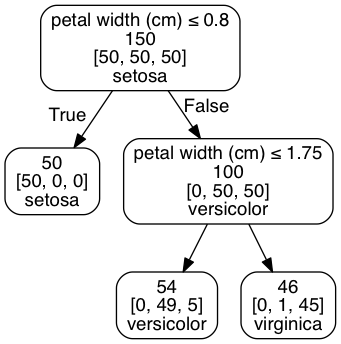

In [17]:
# Specify depth of decision tree
tree_depth = 2
    
# Train the model
model = tree.DecisionTreeClassifier(max_depth = tree_depth)
model.fit(trainingData, trainingLabels)

# Create tree visualization in dot format (via GraphViz)
dot_data = tree.export_graphviz(model, 
                     out_file = None,
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,
                     label = None,
                     impurity = False,
                     rounded = True,  
                     special_characters = True)  

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write('decision-tree-example.png', format = 'png')

# Display graph (optional)
Image('decision-tree-example.png')

In [25]:
# Plot empty accuracy chart for decision tree of depth 0

# Specify output html file 
output_file("accuracy-0.html")

bokeh_plot = figure(plot_width=500,
                    plot_height=500,
                    x_range = Range1d(0, 13, bounds = (0, 13)),
                    y_range = Range1d(-0.04, 1.04, bounds = (-0.04, 1.04)),
                    tools = "hover"
                    )

# Manually set tick marks on the x-axis
bokeh_plot.xaxis[0].ticker=FixedTicker(ticks=[(i+1) for i in range(converged_tree_depth)])

bokeh_plot.xaxis.axis_label = "Tree Depth"
bokeh_plot.yaxis.axis_label = "Accuracy"

save(bokeh_plot)

INFO:bokeh.core.state:Session output file 'accuracy-0.html' already exists, will be overwritten.


'/Users/bradleyputman/Documents/Academic/UC Berkeley/W209-Data Visualization and Communication/Final-Project/decision-tree/accuracy-0.html'

In [26]:
# Plot accuracies for all decision trees calculated up to this point
for i in range(1, 13):
    
    # Specify output html file 
    output_file("accuracy-%d.html" %i)

    bokeh_plot = figure(plot_width=500,
                        plot_height=500,
                        x_range = Range1d(0, 13, bounds = (0, 13)),
                        y_range = Range1d(-0.04, 1.04, bounds = (-0.04, 1.04)),
                        tools = ""
                        )
    
    # Add a custom hover tool to the plot
    custom_hover = HoverTool(tooltips = [("Tree Depth", "$x{0}"), ("Accuracy", "$y{0.00}")])
    bokeh_plot.add_tools(custom_hover)
        
    # Plot the accuracy points up to the current iteration
    accuracy_source = ColumnDataSource(data = dict(x = [(j+1) for j in range(i)],
                                                   y = [accuracies[j] for j in range(i)]))
        
    bokeh_plot.circle(accuracy_source.data['x'],
                      accuracy_source.data['y'],
                      source = accuracy_source,
                      size = 4
                     )

    # Manually set tick marks on the x-axis
    bokeh_plot.xaxis[0].ticker=FixedTicker(ticks=[(i+1) for i in range(converged_tree_depth)])
    
    bokeh_plot.xaxis.axis_label = "Tree Depth"
    bokeh_plot.yaxis.axis_label = "Accuracy"
    
    save(bokeh_plot)

INFO:bokeh.core.state:Session output file 'accuracy-1.html' already exists, will be overwritten.
/Users/bradleyputman/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/bradleyputman/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
INFO:bokeh.core.state:Session output file 'accuracy-2.html' already exists, will be overwritten.
/Users/bradleyputman/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com